In [1]:
#로지스틱 회귀 모형의 class-weight
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/soojungchoi/pythonProject/pythonBasic/data/iris.csv')
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [2]:
df['Species'].iloc[0]

'setosa'

In [3]:
df= df.drop(columns=['Unnamed: 0'], axis=1)

#처음 40행 제거
df2 = df.drop(df.index[range(40)])
df2.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [4]:
#0:setosa, 1:versicolor, 2:virginica'
def func(x):
    if x=='setosa':
        return 0
    elif x=='versicolor':
        return 1
    elif x=='virginica':
        return 2

df2.insert(5,'Result',0)
for i in range(len(df2)):
    df2.Result.iloc[i] = func(df2.Species.iloc[i])


/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
cols=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
X=df2[cols]
y=df2['Result']

In [6]:
df2.Result.value_counts() #불균형 데이터셋

1    50
2    50
0    10
Name: Result, dtype: int64

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'iris\n(0:setosa, 1:versicolor, 2:virginica')

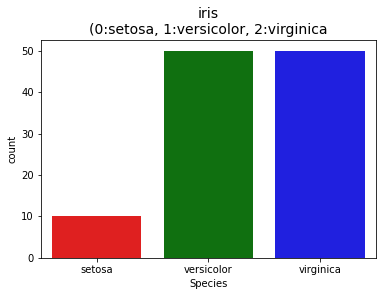

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['red','green','blue']

sns.countplot('Species',data=df2,palette=colors)
plt.title('iris\n(0:setosa, 1:versicolor, 2:virginica',fontsize=14)

In [8]:
#불균형 데이터셋의 경우 언더샘플링 또는 오버샘플링을 하는 것이 일반적인 방법이지만,
#여기서는 class_weight속성을 알아보기 위해 샘플링 과정을 생략한다.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)
y_train.value_counts()

1    40
2    40
0     8
Name: Result, dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression
#기본 옵션 : 모든 클래스에 1이 부여됨
logit1 = LogisticRegression(random_state=0)

#y값에 반비례하는 가중치를 n_samples / (n_classes * np.bincount(y))로 자동 조정
logit2 = LogisticRegression(random_state=0, class_weight='balanced')

#가중치를 직접 입력하는 옵션
logit3 = LogisticRegression(random_state=0, class_weight={0:3,1:1,2:2})

가중치   
클래스의 비율에 따라 가중치를 두는 방법인데, 예를 들어, 클래스의 비율이 1:9 라면 가중치를 9:1로 줌으로써 적은 샘플 수를 가진 클래스를 전체 loss 에 동일하게 기여하도록 할 수 있다.   
   
출처: https://3months.tistory.com/414 [Deep Play]   

In [11]:
#class_weight = 'balanced'일 경우 샘플 갯수에 반비례하는 가중치가 곱해짐
import numpy as np
print(np.bincount(y)) #샘플의 갯수(10/50/50)


[10 50 50]


In [12]:
#error : invalid literal for int() with base 10: 'setosa'

# str 이라 int로 빈도수 확인이 안된다
# dataset의 result 값을 species 값에 따른 int값으로 가져와 사용했다. > dataset 가공에서 문제 > 함수를 이용해 해결

In [13]:
#n_samples / (n_classes * np.bincount(y))
print(88 / 3*np.bincount(y))

[ 293.33333333 1466.66666667 1466.66666667]


In [14]:
for logit in [logit1,logit2,logit3]:
    logit.fit(X_train, y_train)
    print(logit)
    print('학습용:',logit.score(X_train,y_train))
    print('검증용:',logit.score(X_test,y_test))
    print()
    
#logit3 모형은 class 0의 샘플 수가 너무 적으므로 경고 메세지가 출력됨  >?출력안되는데..?  

LogisticRegression(random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight='balanced', random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight={0: 3, 1: 1, 2: 2}, random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

